## Final Project Submission

Please fill out:
* Student name: Aisha Hamid
* Student pace: part time
* Scheduled project review date/time: 16/04/2023 
* Instructor name: William Okomba
* Blog post URL:


# Success of Different Movie Types Analysis

# Overview

This project aims to analyze a movie dataset to identify the types of movies that are performing well in terms of production budget,worldwide gross,genre, runtime and rating_y to identify trends, patterns and relationships. We will use exploratory data analysis to generate insights for a business stakeholder.

# **Business Problem**

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.
The key business questions are;
 1. What is the most profitable movie genre?
 2. What is the ideal production budget to produce a successful movie?
 3. Which type of movie has the highest ratings?
 4. Does the movie runtime influence the success of a movie?	


# Data Understanding

The dataset was obtained from various locations;
[IMDB](https://www.imdb.com/), [Box Office Mojo](https://www.boxofficemojo.com/), [Rotten Tomatoes](https://www.rottentomatoes.com/), [TheMovieDB](https://www.themoviedb.org/) and [The Numbers](https://www.the-numbers.com/).The different files have different formats,some are compressed CSV (comma-separated values) or TSV (tab-separated values) files and contains information on over 10,000 movies. The data is organized into several tables and several columns containing different information about the movies e.g the movie title, production budget, genre, runtime, and rating_y; each movie having a unique ID. Some of the challenges encountered during data preparation included missing values,outliers and placeholders.


**Importing modules**

In [1]:
import pandas as pd
import csv
import sqlite3
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

# Data Preparation

# **Data Cleaning**

Read and previewing of our datasets

**Reviews Data**

In [2]:
#loading tsv file reviews into a dataframe and viewing the first 10 rows
df_reviews = pd.read_csv('rt.reviews.tsv.gz', delimiter = '\t' ,compression='gzip',encoding = 'latin1' ,index_col = 0 )
df_reviews.head(10)

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
3,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0,Capital New York,"September 11, 2017"
3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
3,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0,Parallax View,"March 24, 2013"


In [3]:
#Check the table df_rewiews info
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  int64 
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


In [4]:
# check null values in df_reviews dataframe
perc = df_reviews.isnull().sum()/len(df_reviews)
perc

review        0.102201
rating        0.248328
fresh         0.000000
critic        0.050007
top_critic    0.000000
publisher     0.005677
date          0.000000
dtype: float64

In [5]:
# Scheming the ratings
df_reviews['rating'].unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

In [6]:
# Change rating data type to numeric
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'],errors='coerce')

In [7]:
# Checking the unique values in ratings column
df_reviews['rating'].unique()

array([nan, 8. , 6. , 7. , 3. , 2.5, 9. , 1. , 5. , 0. , 2. , 4.5, 7.7,
       3.5, 2.7, 5.8, 4. , 4.9, 1.5, 2.2, 7.3, 3.2, 4.2, 8.4, 1.8, 8.9,
       1.7, 7.9, 6.7, 5.2, 5.9, 3.7, 4.7, 8.2, 3.4, 9.7, 7.4, 4.8, 9.2,
       3.1, 7.8, 6.2, 3.3, 9.8, 8.5, 4.1, 7.1])

In [8]:
# Drop null values
df_reviews.dropna(inplace=True)

In [9]:
#Calling the reviews dataframe to see the data after cleaning
df_reviews

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
10,If all you're looking for is a mild comedy wit...,6.0,rotten,Scott Weinberg,0,Apollo Guide,"March 16, 2004"
10,There's probably a sweet little comedy hidden ...,6.0,rotten,Brian Webster,0,Apollo Guide,"June 12, 2002"
13,"While it's most certainly not light viewing, a...",8.0,fresh,Brian Webster,0,Apollo Guide,"October 3, 2007"
13,I do just what I want to do/ I want everything...,8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"June 29, 2007"
...,...,...,...,...,...,...,...
1986,...bleakness juxtaposed with bemusement...,3.5,fresh,Josh Larsen,0,"Sun Publications (Chicago, IL)","June 27, 2003"
1995,"It's shallow, predictable and completely overb...",6.0,rotten,Brian Webster,0,Apollo Guide,"January 1, 2000"
1996,"Dumb and silly and fun, just not as dumb and s...",6.0,rotten,Dan Jardine,0,Cinemania,"August 18, 2006"


In [10]:
# cross check whether the null values are dropped
df_reviews.isna().sum()

review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

**Movie Info Data**

In [11]:
#loading tsv file movie_info into a dataframe and viewing the first 10 rows
df_movieinfo = pd.read_csv('rt.movie_info.tsv.gz',delimiter = '\t',compression='gzip',encoding='latin1')
df_movieinfo.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [12]:
#check df_movieinfo table's info
df_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [13]:
#check missing data in movie_info table
perc = df_movieinfo.isnull().sum()/len(df_movieinfo)
perc

id              0.000000
synopsis        0.039744
rating          0.001923
genre           0.005128
director        0.127564
writer          0.287821
theater_date    0.230128
dvd_date        0.230128
currency        0.782051
box_office      0.782051
runtime         0.019231
studio          0.683333
dtype: float64

There are 8 missing values in genre column.Dropping the missing values is the best otion here since the missing values are a smaller percentage of the whole genre column.

In [14]:
#Dropping columns with higher percentage of missing data
df_movieinfo.drop(columns = ['currency','box_office','studio'],inplace=True)

In [15]:
#dropping null values in the dataframe movieinfo
df_movieinfo.dropna(axis=0,inplace=True)

In [16]:
#Checking whether the missing vakues are dropped and the number of columns left 
df_movieinfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 1558
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            881 non-null    int64 
 1   synopsis      881 non-null    object
 2   rating        881 non-null    object
 3   genre         881 non-null    object
 4   director      881 non-null    object
 5   writer        881 non-null    object
 6   theater_date  881 non-null    object
 7   dvd_date      881 non-null    object
 8   runtime       881 non-null    object
dtypes: int64(1), object(8)
memory usage: 68.8+ KB


In [17]:
# Changing data types of the run time column removing the string minutes and changing to a float data type
df_movieinfo['runtime'] = df_movieinfo['runtime'].apply(lambda x: float(x.replace(' minutes', '')))


**Movie Budget Data**

In [18]:
#loading csv file movie_budgets into a dataframe and viewing the first 10 rows
df_moviebudget = pd.read_csv('tn.movie_budgets.csv.gz',compression = 'gzip')
df_moviebudget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [19]:
# remove rows with a domestic gross or worldwide gross of $0
df_moviebudget = df_moviebudget[(df_moviebudget['domestic_gross'] != '$0') & (df_moviebudget['worldwide_gross'] != '$0')]

In [20]:
df_moviebudget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,"$7,000","$70,071","$71,644"
5776,77,"Dec 31, 2004",The Mongol King,"$7,000",$900,$900
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [21]:
# Checking the movie budget dataframe's info
df_moviebudget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5234 non-null   int64 
 1   release_date       5234 non-null   object
 2   movie              5234 non-null   object
 3   production_budget  5234 non-null   object
 4   domestic_gross     5234 non-null   object
 5   worldwide_gross    5234 non-null   object
dtypes: int64(1), object(5)
memory usage: 286.2+ KB


In [22]:
#check missing values of the df_moviebudget table
df_moviebudget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [23]:
# Changing data types of columns

# define a function to remove dollar sign and commas from a string
def remove_currency(string):
    string = string.replace('$', '')
    string = string.replace(',', '')
    return int(string)

# apply the function to the worldwide_gross,domestic_gross and production_budget column
df_moviebudget['worldwide_gross'] = df_moviebudget['worldwide_gross'].apply(remove_currency)
df_moviebudget['domestic_gross'] = df_moviebudget['domestic_gross'].apply(remove_currency)
df_moviebudget['production_budget'] = df_moviebudget['production_budget'].apply(remove_currency)



In [24]:
# Check if the columns are cleaned
df_moviebudget[['production_budget','domestic_gross','worldwide_gross']]

,production_budget,domestic_gross,worldwide_gross
0,425000000,760507625,2776345279
1,410600000,241063875,1045663875
2,350000000,42762350,149762350
3,330600000,459005868,1403013963
4,317000000,620181382,1316721747
...,...,...,...
5775,7000,70071,71644
5776,7000,900,900
5778,6000,48482,240495
5779,5000,1338,1338


**Merging The Three Datasets**

In [25]:
# Merging the three datasets on id column
merged_df = pd.merge(df_movieinfo, df_moviebudget, on='id')
merged_df = pd.merge(merged_df, df_reviews, on='id')


In [26]:
merged_df

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,runtime,release_date,...,production_budget,domestic_gross,worldwide_gross,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,"Jun 7, 2019",...,350000000,42762350,149762350,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,"Nov 21, 2018",...,175000000,201091711,524283695,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,"Apr 8, 2005",...,145000000,68671925,121671925,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,"Oct 5, 2018",...,116000000,213511408,853628605,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108.0,"Feb 18, 2005",...,100000000,17018422,59918422,"... a movie about a sentient zombie, trapped i...",8.0,fresh,Philip Martin,0,Arkansas Democrat-Gazette,"September 7, 2012"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,95,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,"Jul 13, 2018",...,2000000,13539710,14341016,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"
1562,95,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,"Sep 7, 2007",...,1500000,175281,240396,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"
1563,95,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,"Feb 11, 2005",...,1100000,4563167,24062965,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"
1564,95,BLEED FOR THIS is the incredible true story of...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",116.0,"Mar 19, 1999",...,1000000,5494,5494,Paz's return to the ring is inherently inspiri...,8.0,fresh,Dan Lybarger,0,Arkansas Democrat-Gazette,"November 18, 2016"


In [27]:
# viewing types of genre and their counts
merged_df['genre'].value_counts()

Action and Adventure|Mystery and Suspense                               212
Comedy|Drama                                                            212
Drama                                                                   207
Comedy                                                                  157
Art House and International|Drama|Musical and Performing Arts           156
Action and Adventure                                                    108
Comedy|Mystery and Suspense|Science Fiction and Fantasy|Romance         100
Action and Adventure|Classics|Drama                                      53
Action and Adventure|Art House and International|Drama                   53
Mystery and Suspense                                                     53
Drama|Science Fiction and Fantasy                                        52
Comedy|Romance                                                           52
Comedy|Musical and Performing Arts                                       52
Art House an

In [28]:
# Checking the columns of our merged dataset
merged_df.columns

Index(['id', 'synopsis', 'rating_x', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'runtime', 'release_date', 'movie',
       'production_budget', 'domestic_gross', 'worldwide_gross', 'review',
       'rating_y', 'fresh', 'critic', 'top_critic', 'publisher', 'date'],
      dtype='object')

In [29]:
# Checking the variables of interest in our merged dataset
merged_df[['genre','runtime','rating_x','rating_y','worldwide_gross','production_budget']]

,genre,runtime,rating_x,rating_y,worldwide_gross,production_budget
0,Drama|Science Fiction and Fantasy,108.0,R,8.0,149762350,350000000
1,Drama|Science Fiction and Fantasy,108.0,R,8.0,524283695,175000000
2,Drama|Science Fiction and Fantasy,108.0,R,8.0,121671925,145000000
3,Drama|Science Fiction and Fantasy,108.0,R,8.0,853628605,116000000
4,Drama|Science Fiction and Fantasy,108.0,R,8.0,59918422,100000000
...,...,...,...,...,...,...
1561,Drama|Sports and Fitness,116.0,R,8.0,14341016,2000000
1562,Drama|Sports and Fitness,116.0,R,8.0,240396,1500000
1563,Drama|Sports and Fitness,116.0,R,8.0,24062965,1100000
1564,Drama|Sports and Fitness,116.0,R,8.0,5494,1000000


Let us plot a histogram to view our dataset and check for outliers

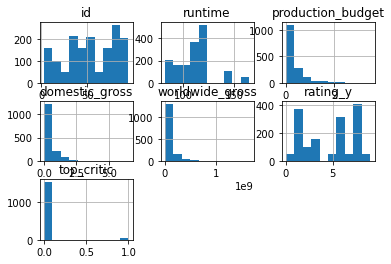

In [30]:
# plotting a hsitogram
merged_df.hist();

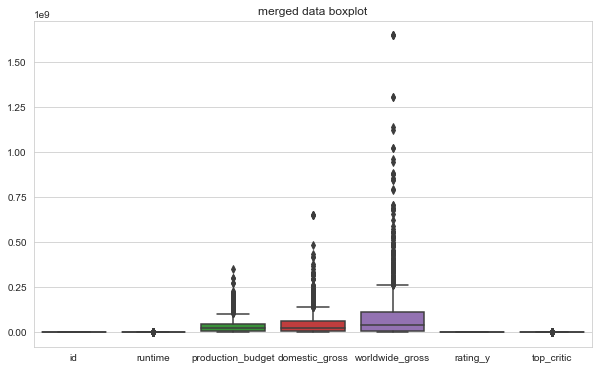

In [31]:
# Lets check for outliers. Lets plot our boxplot
# using seaborn
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=merged_df, ax=ax)

# Set the plot title
plt.title('merged data boxplot')

# Show the plot
plt.show();

From the box plot above, the columns production_budget,domestic_gross and worldwide_gross have many outliers. However, the dataset is from movie productions which represents a real world dataset we shall keep the outliers.
Let's describe the statistics of each column in our merged data set.

# Exploratory Data Analysis

# Univariate analysis

Check the statistical summaries of our merged dataset. Checking the mean,median,mode, variance and standard deviation of our variables of interest.

In [32]:
# Lets check for our merged data statistics
# use parameter include="all" to include categorical variables 
merged_df.describe(include = "all")

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,runtime,release_date,...,production_budget,domestic_gross,worldwide_gross,review,rating_y,fresh,critic,top_critic,publisher,date
count,1566.000000,1566,1566,1566,1566,1566,1566,1566,1566.000000,1566,...,1.566000e+03,1.566000e+03,1.566000e+03,1566,1566.000000,1566,1566,1566.000000,1566,1566
unique,NaN,19,4,15,19,19,19,19,NaN,797,...,NaN,NaN,NaN,30,NaN,2,23,NaN,16,26
top,NaN,Director John Woo brings Hong Kong-style marti...,R,Action and Adventure|Mystery and Suspense,John Woo,William Goldman|John Logan|David Marconi|Micha...,"Dec 31, 2000","Nov 7, 2000",NaN,"Oct 14, 2011",...,NaN,NaN,NaN,It's a movie about starting over when you're p...,NaN,fresh,Brian Webster,NaN,Apollo Guide,"January 1, 2000"
freq,NaN,212,563,212,212,212,212,212,NaN,8,...,NaN,NaN,NaN,55,NaN,1043,156,NaN,518,264
mean,52.843550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.846105,NaN,...,3.393115e+07,4.513003e+07,9.675291e+07,NaN,4.663282,NaN,NaN,0.032567,NaN,NaN
std,26.861884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.279056,NaN,...,4.232736e+07,6.684727e+07,1.688439e+08,NaN,2.926440,NaN,NaN,0.177557,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.000000,NaN,...,1.100000e+03,5.270000e+02,5.270000e+02,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.000000,NaN,...,6.500000e+06,4.073250e+06,7.638758e+06,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113.000000,NaN,...,2.000000e+07,2.247096e+07,3.835991e+07,NaN,6.000000,NaN,NaN,0.000000,NaN,NaN
75%,77.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123.000000,NaN,...,4.475000e+07,5.825080e+07,1.092342e+08,NaN,8.000000,NaN,NaN,0.000000,NaN,NaN


- The **production budget** of movies in the dataset has the following characteristics:

    - The average production budget is USD 33,931,150 with a variation of +/-         USD 42,327,360.
    - The lowest production budget is USD 1,100.
    - The highest production budget is USD 350,000,000.

- **Runtime:** The average runtime of a movie is 111.8 minutes with a variation of +/- 18.2 minutes. The highest runtime of a movie in the dataset is 165 minutes, and the lowest runtime is 82 minutes.

- **Genre:** The most frequent genre of movies in the dataset is Action and Adventure|Mystery and Suspense.

- **Ratings:** The average rating of movies in the dataset is 4.6.


Lets count unique values in the genre column

In [33]:
# Checking unique value counts
genres = merged_df['genre'].value_counts()
genres

Action and Adventure|Mystery and Suspense                               212
Comedy|Drama                                                            212
Drama                                                                   207
Comedy                                                                  157
Art House and International|Drama|Musical and Performing Arts           156
Action and Adventure                                                    108
Comedy|Mystery and Suspense|Science Fiction and Fantasy|Romance         100
Action and Adventure|Classics|Drama                                      53
Action and Adventure|Art House and International|Drama                   53
Mystery and Suspense                                                     53
Drama|Science Fiction and Fantasy                                        52
Comedy|Romance                                                           52
Comedy|Musical and Performing Arts                                       52
Art House an

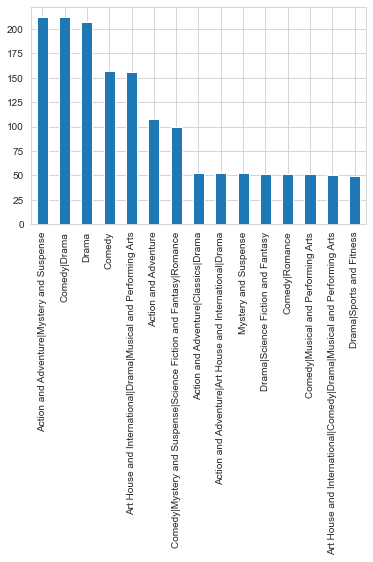

In [34]:
# Plot a bar graph of genre
genres.plot(kind='bar');

There are 250 movies with genre Action and Adventure|Mystery and Suspense which is the highest genre. The most common genres are Comedy|Drama and Comedy.

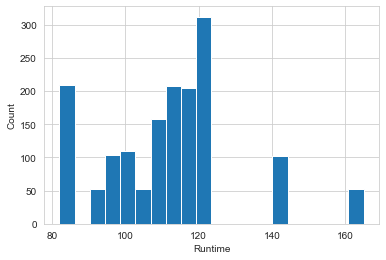

In [35]:
# Plotting a histogram showing distribution of movie runtime
plt.hist(merged_df['runtime'], bins=20)
plt.xlabel('Runtime')
plt.ylabel('Count')
plt.show();


Over 300 movies have a runtime of 120-125 minutes. There are outliers in the runtime dataset which are genuine observations that reflect the true nature of the data and do not affect our analysis.

# Bivariate analysis

#  Analyzing correlation of the numeric variables

Let's analyize the correlation between the variables

In [36]:
# Apply .corr() on the merged dataframe
merged_df.corr()

,id,runtime,production_budget,domestic_gross,worldwide_gross,rating_y,top_critic
id,1.000000,0.189055,-0.040463,0.022687,-0.018265,-0.151351,0.007901
runtime,0.189055,1.000000,-0.007872,0.004056,-0.007864,0.157507,0.302766
production_budget,-0.040463,-0.007872,1.000000,0.638150,0.709974,0.013413,-0.001113
domestic_gross,0.022687,0.004056,0.638150,1.000000,0.944281,-0.022985,0.004845
worldwide_gross,-0.018265,-0.007864,0.709974,0.944281,1.000000,-0.015837,0.003079
rating_y,-0.151351,0.157507,0.013413,-0.022985,-0.015837,1.000000,0.190451
top_critic,0.007901,0.302766,-0.001113,0.004845,0.003079,0.190451,1.000000


* There is a weak positive correlation between runtime and domestic_gross (0.00405) and a weak negative correlation between runtime and worldwide_gross (-0.0078).
* There is a positive correlation between production_budget and domestic_gross (0.638) and worldwide_gross (0.710), meaning that as the production budget of a movie increases, the domestic and worldwide gross also tend to increase.
* There is a positive correlation between domestic_gross and worldwide_gross (0.944), meaning that as the domestic gross of a movie increases, the worldwide gross also tends to increase.
* There is a weak positive correlation between rating_y and top_critic (0.190), meaning that movies with higher ratings tend to have slightly more top critics.



**Using a heatmap to visualize the correlation between continous varaibles**

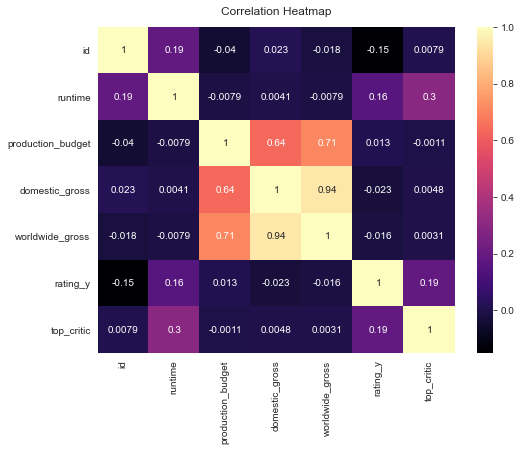

In [37]:
# Visualizing the correlation coefficients of the merged data set
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(merged_df.corr(),annot=True,cmap='magma')


heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);


# Genres against worldwide_gross

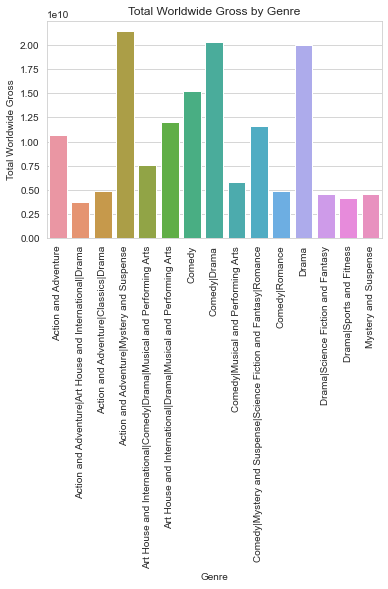

In [38]:
# Plotting a bar plot of genres and worldwide_gross varaible
# Calculate the total worldwide gross for each genre
genre_gross = merged_df.groupby('genre')['worldwide_gross'].sum().reset_index()

# Create a bar chart
sns.barplot(x='genre', y='worldwide_gross', data=genre_gross)

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Total Worldwide Gross')
plt.title('Total Worldwide Gross by Genre')

# Set the plot size
ax.set_ylim([0, 2e9]) # set the y-axis limit
plt.tight_layout() # adjust the plot layout

# Display the plot
plt.show();



* The genre with the highest worldwide_gross is Action and Adventure|Mystery and Suspense followed by Drama and Comedy Drama.
* The genre with the least worldwide_gross is Action and Adventure|Art House and International|Drama.

# Genres against aggregate production_budget

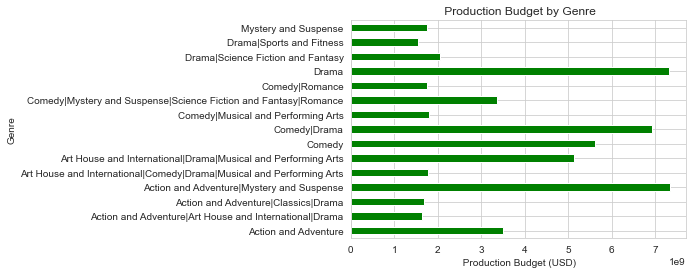

In [39]:
# Group the movies by genre and calculate the mean production budget for each group
budget_by_genre = merged_df.groupby("genre")["production_budget"].sum()

# Create a horizontal bar chart
budget_by_genre.plot(kind="barh", color="green")

# Set the chart title and axis labels
plt.title(" Production Budget by Genre")
plt.xlabel(" Production Budget (USD)")
plt.ylabel("Genre")

# Display the chart
plt.show();

* The genre with the highest aggregate production budget is Drama followed by Action and Adventure|Mystery and Suspense.
* The genre with the lowest mean production budget is Action and Adventure|Art House and International|Drama.

 # Genre against aggregate rating_y


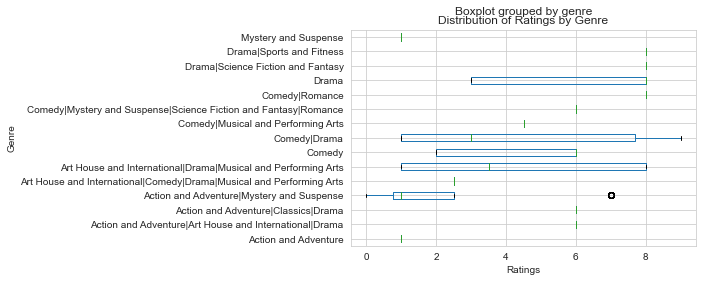

In [40]:
# plotting a horizontal boxplot showing the distribution of ratings for each movie genre
merged_df.boxplot(column="rating_y", by="genre", vert=False)

# Set the chart title and axis labels
plt.title("Distribution of Ratings by Genre")
plt.xlabel("Ratings")
plt.ylabel("Genre")

# Display the chart
plt.show();


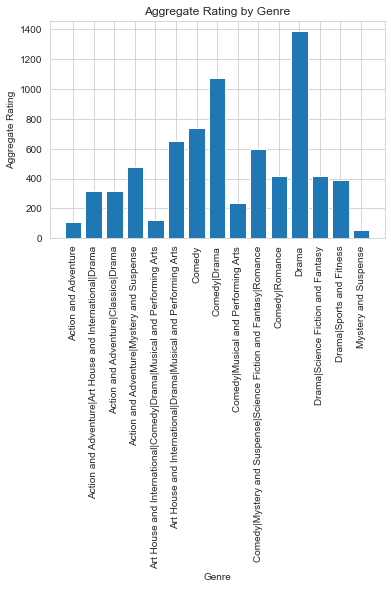

In [41]:
# group the data by genre and calculate the aggregate rating_y for each genre
grouped_data = merged_df.groupby('genre')['rating_y'].sum()

# create a bar plot
plt.bar(grouped_data.index, grouped_data.values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Aggregate Rating')
plt.title('Aggregate Rating by Genre')
plt.show();


Movie genre Drama has the highest average ratings.

# Conclusions

This analysis led to four conclusions;
* The higher the production budget the higher the domestic and worldwide gross of a movie
* The higher the domestic gross the higher the worldwide gross of a movie
* The movie genre that is most profitable is Drama and also has the highest ratings.
* The movie runtime doesnot influence the success of a movie as it has a weak negative correlation between both worldwide gross and production budget of -0.0078.

# Recommendations

Overall, it is important to consider a variety of factors when making decisions about movie production, marketing, and distribution. While there may be some general trends and correlations in the industry, each movie is unique and requires a tailored approach to maximize its chances of success.
* While a higher budget may increase the chances of success, it is not a guarantee and it may be more cost-effective to focus on other aspects of the movie's release.
* While drama may be a popular and successful genre, it is important to consider the specific story and characters of each movie and determine the most effective genre to present them. Other genres such as action, comedy and horror may also be highly profitable and successful, depending on the audience and critical reception.
* While movie runtime may not be a significant factor in a movie's success, it is important to consider the specific story and pacing of each movie and determine the most effective length to convey the desired message. A longer runtime may be effective for certain movies, while others may benefit from a shorter, more focused approach.
* While domestic and worldwide grosses may be related, it is important to consider the specific target audience for a movie and tailor marketing and distribution efforts accordingly. Some movies may perform better in certain regions or countries, and it may be more effective to focus on these markets rather than trying to appeal to a broader audience.

# Next steps

Further analysis could yield additional insights to improve predictions of successful movies
* Stay up-to-date with industry trends and changes, and adjust strategies as needed to remain competitive. The movie industry is constantly evolving, and it is important to stay informed and adapt to new developments and challenges as they arise.
* Conduct further research and analysis to better understand the specific factors that influence the success of movies in a target market e.g looking at industry data, conducting surveys or focus groups with target audiences, or analyzing critical reviews and social media sentiment.